In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MultiLabelBinarizer
!pip install mlxtend
from mlxtend.frequent_patterns import apriori,association_rules

In [5]:
df = pd.read_csv('AirPassengers.csv')
df.head(12)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [6]:
df.shape

(144, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
df.duplicated().sum()

0

In [12]:
df.drop_duplicates()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [13]:
df.index = df['Month']
df

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [14]:
del df['Month']

In [15]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [16]:
df.shape

(144, 1)

<Axes: xlabel='Month'>

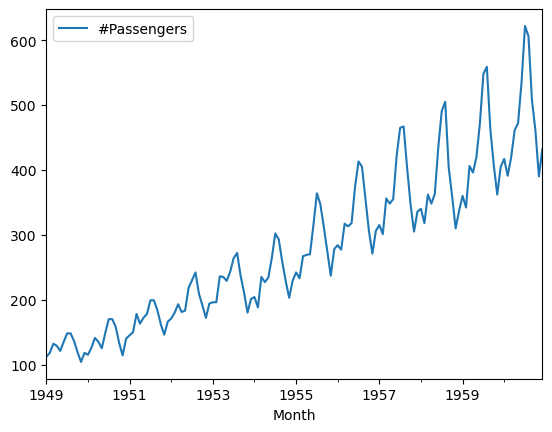

In [17]:
df.plot()

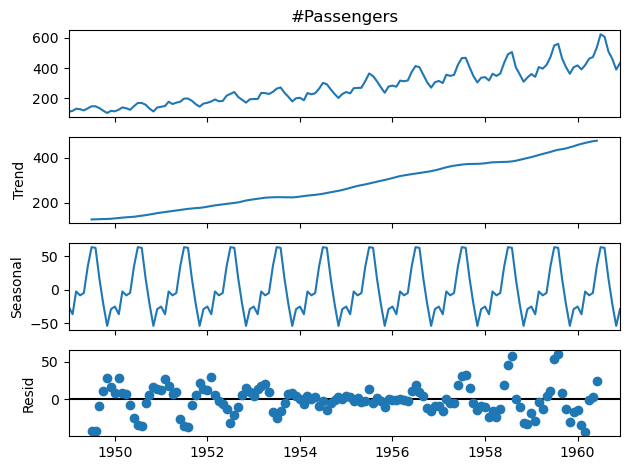

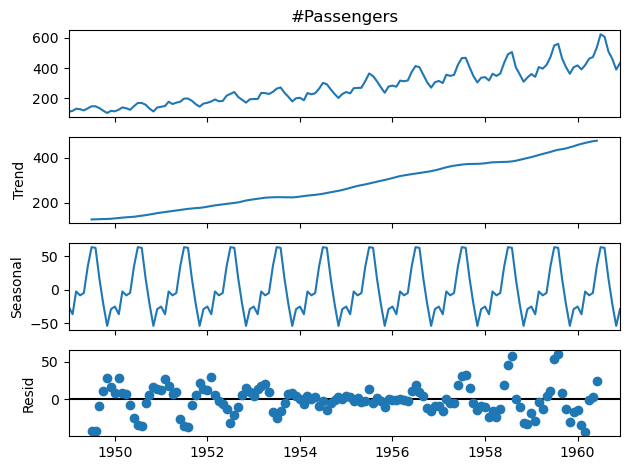

In [19]:
decompose = seasonal_decompose(df['#Passengers'])
decompose.plot()

In [21]:
roll = df.rolling(window=12).mean()
roll.head(15)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


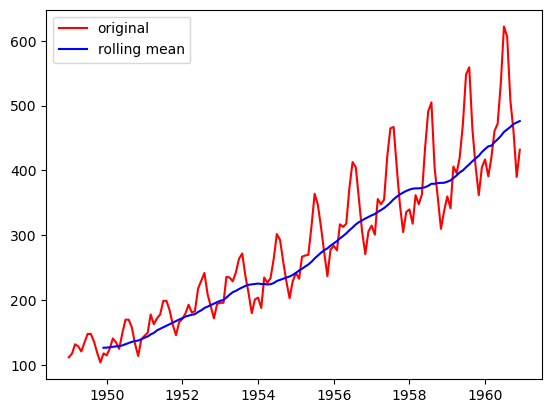

In [23]:
plt.plot(df,color='r',label='original')
plt.plot(roll,color='b',label='rolling mean')
plt.legend(loc='best')
plt.show()

In [26]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['#Passengers'])
print(result[1])

0.991880243437641


In [28]:
df['#Passengers'].diff().dropna()

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 143, dtype: float64

In [29]:
res = adfuller(df['#Passengers'].diff().dropna())
res[1]

0.05421329028382711

<Axes: xlabel='Month'>

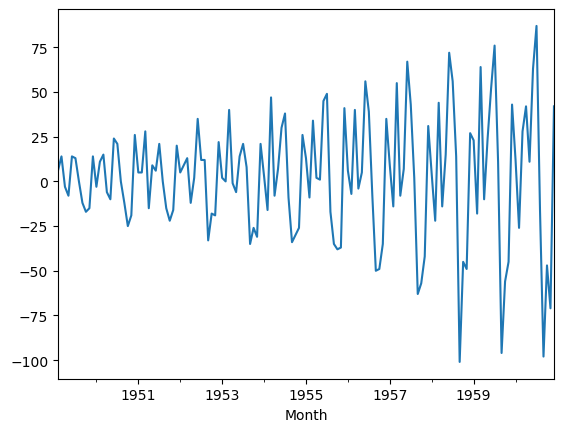

In [32]:
df['#Passengers'].diff().dropna().plot()

In [33]:
new_df = pd.DataFrame(df['#Passengers'].diff().dropna())
new_df

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [43]:
new_roll = new_df.rolling(window=12).mean()

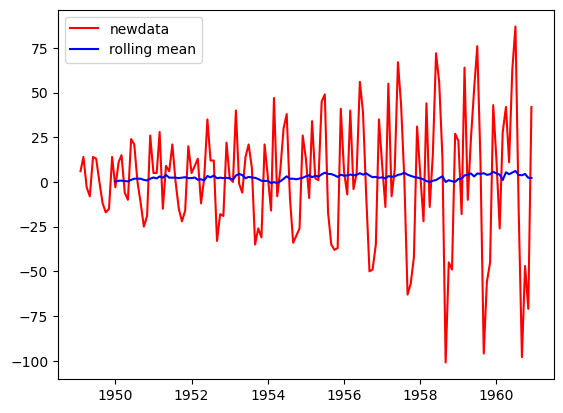

In [44]:
plt.plot(new_df,color='r',label='newdata')
plt.plot(new_roll,color='b',label='rolling mean')
plt.legend(loc='best')
plt.show()

In [45]:
new_res = adfuller(new_df['#Passengers'])
new_res[1]

0.05421329028382711

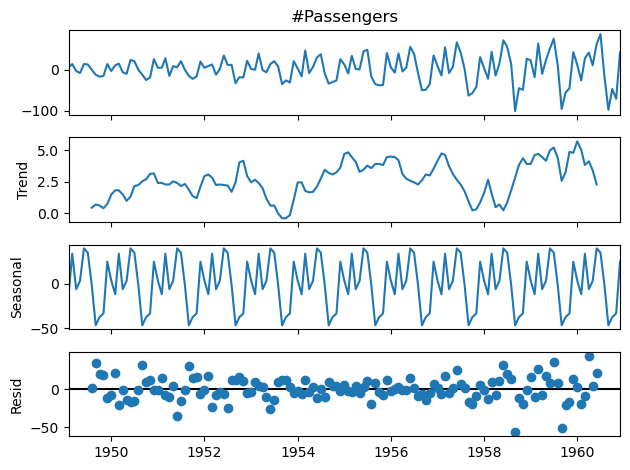

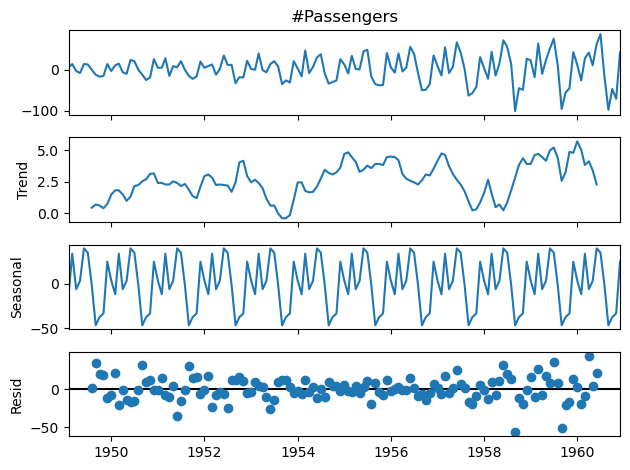

In [46]:
new_decompose = seasonal_decompose(new_df['#Passengers'])
new_decompose.plot()

In [47]:
new_df.shape

(143, 1)

In [57]:
train = new_df.iloc[:120]['#Passengers']
test = new_df.iloc[121:]['#Passengers']
train

Month
1949-02-01      6.0
1949-03-01     14.0
1949-04-01     -3.0
1949-05-01     -8.0
1949-06-01     14.0
              ...  
1958-09-01   -101.0
1958-10-01    -45.0
1958-11-01    -49.0
1958-12-01     27.0
1959-01-01     23.0
Name: #Passengers, Length: 120, dtype: float64

In [66]:
# order = p=1,d=0,q=2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

C:\Users\vaibh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [68]:
len(train)+len(test)-1

141

In [69]:
df['predict'] = model_fit.predict(2,len(train)+len(test),dynamic=True)

In [63]:
df[['#Passengers','predict']]

,#Passengers,predict
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,3.881675
1949-05-01,121,-1.389265
...,...,...
1960-08-01,606,2.446821
1960-09-01,508,2.446821
1960-10-01,461,2.446821


<Axes: xlabel='Month'>

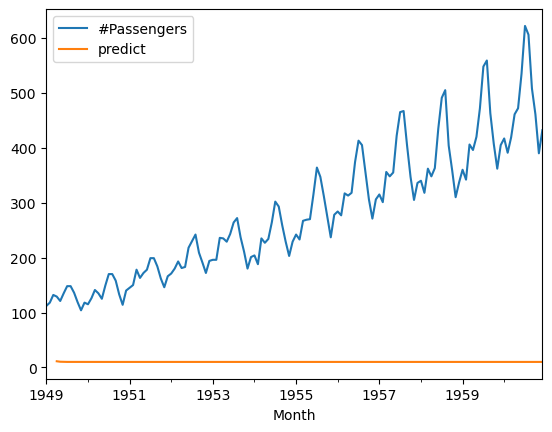

In [70]:
df[['#Passengers','predict']].plot()

In [77]:
forcast = model_fit.predict(start=len(df),end=len(df)+10,type='levels')

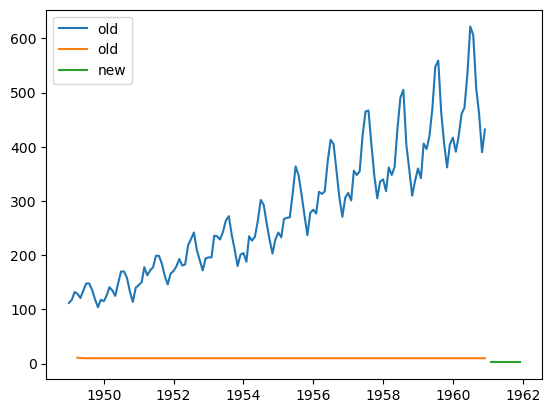

In [78]:
plt.plot(df,label='old')
plt.plot(forcast,label='new')
plt.legend(loc='best')

In [83]:
forcas = model_fit.predict(start=len(new_df),end=len(new_df)+100,type='levels')

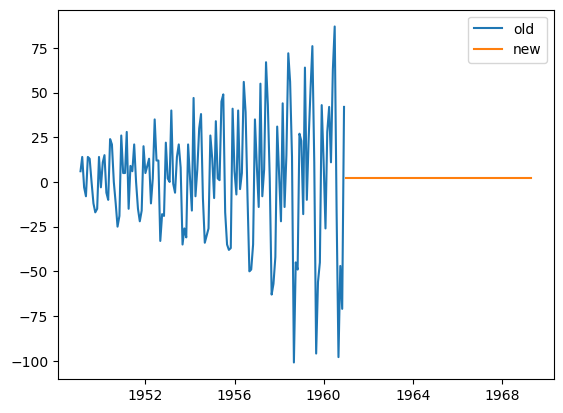

In [84]:
plt.plot(new_df,label='old')
plt.plot(forcas,label='new')
plt.legend(loc='best')

In [86]:
new_df['predict'] = model_fit.predict(start = 2,end = len(train)+len(test),dynamic=True)
new_df

,#Passengers,predict
Month,,
1949-02-01,6.0,NaN
1949-03-01,14.0,NaN
1949-04-01,-3.0,11.186996
1949-05-01,-8.0,10.350595
1949-06-01,14.0,10.101905
...,...,...
1960-08-01,-16.0,9.996672
1960-09-01,-98.0,9.996672
1960-10-01,-47.0,9.996672


<Axes: xlabel='Month'>

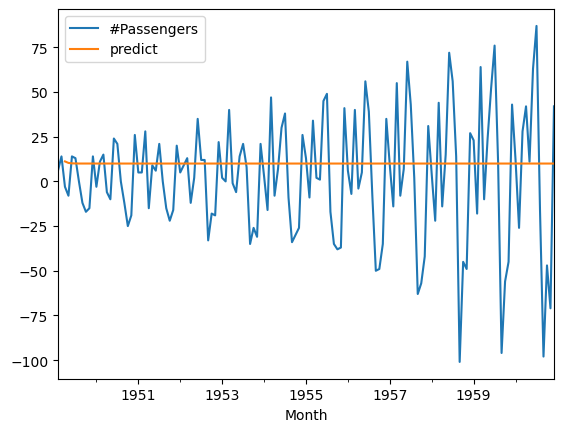

In [87]:
new_df[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

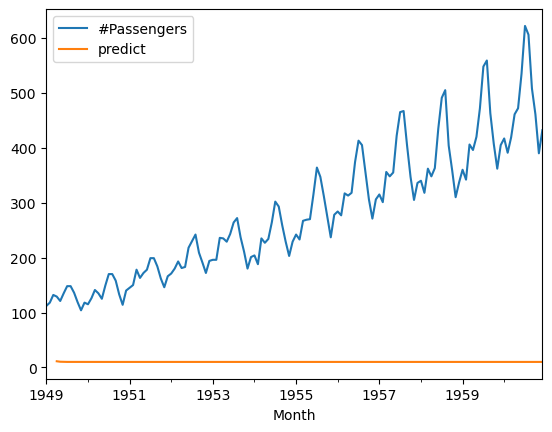

In [88]:
df[['#Passengers','predict']].plot()

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults


In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [92]:
model = SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12)).fit()

C:\Users\vaibh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vaibh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [97]:
train['predict'] = model.predict(2,len(train)+len(test)-1,dynamic=True)


C:\Users\vaibh\AppData\Local\Temp\ipykernel_4756\1095556378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['predict'] = model.predict(2,len(train)+len(test)-1,dynamic=True)


<Axes: xlabel='Month'>

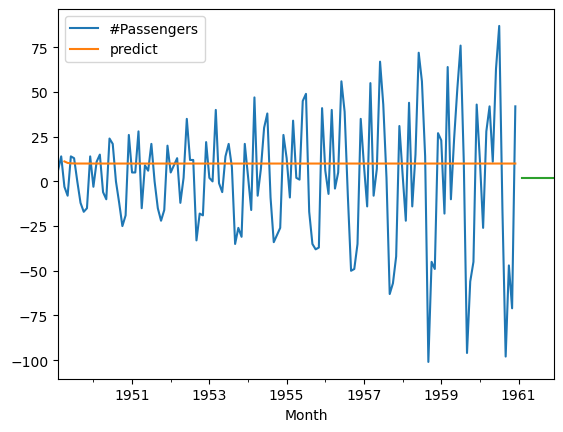

In [98]:
f = model.forecast(steps=24)
new_df.plot()
forcast.plot()

In [99]:
train

Month
1949-02-01 00:00:00                                                  6.0
1949-03-01 00:00:00                                                 14.0
1949-04-01 00:00:00                                                 -3.0
1949-05-01 00:00:00                                                 -8.0
1949-06-01 00:00:00                                                 14.0
                                             ...                        
1958-10-01 00:00:00                                                -45.0
1958-11-01 00:00:00                                                -49.0
1958-12-01 00:00:00                                                 27.0
1959-01-01 00:00:00                                                 23.0
predict                1949-04-01     13.998709
1949-05-01     13.999...
Name: #Passengers, Length: 121, dtype: object

In [103]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [104]:
df['1949-01-01':'1960-04-01']

,#Passengers,predict
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,11.186996
1949-05-01,121,10.350595
...,...,...
1959-12-01,405,9.996672
1960-01-01,417,9.996672
1960-02-01,391,9.996672
